In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import normalize
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.utils import to_categorical
%matplotlib inline

In [2]:
for dirname, _, filenames in os.walk('\Final year project\Brain Tumor'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
image_directory='..\Final year project\Brain Tumor/'

no_tumor_images=os.listdir(image_directory+ 'no/')
yes_tumor_images=os.listdir(image_directory+ 'yes/')
# initialize dataset and label arrays
dataset=[]
label=[]
# set input size
INPUT_SIZE=64

In [4]:
for i , image_name in enumerate(no_tumor_images):
    if(image_name.split('.')[1]=='jpg'):
        image=cv2.imread(image_directory+'no/'+image_name)
        image=Image.fromarray(image,'RGB')
        image=image.resize((INPUT_SIZE,INPUT_SIZE))
        dataset.append(np.array(image))
        label.append(0)
        
        
for i , image_name in enumerate(yes_tumor_images):
    if(image_name.split('.')[1]=='jpg'):
        image=cv2.imread(image_directory+'yes/'+image_name)
        image=Image.fromarray(image, 'RGB')
        image=image.resize((INPUT_SIZE,INPUT_SIZE))
        dataset.append(np.array(image))
        label.append(1)

dataset=np.array(dataset)
label=np.array(label)

In [5]:
dataset = np.array(dataset) 
label = np.array(label)

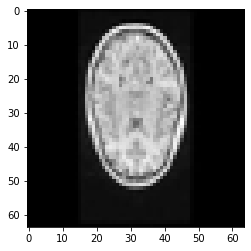

In [6]:
plt.imshow(dataset[4])

In [11]:
x_train, x_test, y_train, y_test = train_test_split(dataset, label, test_size = 0.2, random_state = 42)
              
print(x_train.shape) 
print(y_train.shape) 

(2400, 64, 64, 3)
(2400,)


In [12]:
print(x_test.shape)
print(y_test.shape)

(600, 64, 64, 3)
(600,)


In [13]:
x_train = normalize( x_train, axis =1)
x_test = normalize( x_test, axis =1)

In [14]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape = (INPUT_SIZE, INPUT_SIZE, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3),  kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 activation (Activation)     (None, 62, 62, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 29, 29, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                    

In [16]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [17]:
model.fit(x_train, y_train, 
batch_size = 16, 
verbose = 1, epochs = 10, 
validation_data = (x_test, y_test),
shuffle = 'False')

Epoch 1/10
150/150 [==============================] - 6s 35ms/step - loss: 0.5573 - accuracy: 0.7083 - val_loss: 0.4557 - val_accuracy: 0.8283
Epoch 2/10
150/150 [==============================] - 5s 33ms/step - loss: 0.4265 - accuracy: 0.8154 - val_loss: 0.3345 - val_accuracy: 0.8533
Epoch 3/10
150/150 [==============================] - 5s 34ms/step - loss: 0.3281 - accuracy: 0.8637 - val_loss: 0.2667 - val_accuracy: 0.8850
Epoch 4/10
150/150 [==============================] - 5s 34ms/step - loss: 0.2377 - accuracy: 0.9133 - val_loss: 0.1840 - val_accuracy: 0.9333
Epoch 5/10
150/150 [==============================] - 7s 44ms/step - loss: 0.1550 - accuracy: 0.9463 - val_loss: 0.1375 - val_accuracy: 0.9617
Epoch 6/10
150/150 [==============================] - 6s 40ms/step - loss: 0.1027 - accuracy: 0.9679 - val_loss: 0.1389 - val_accuracy: 0.9550
Epoch 7/10
150/150 [==============================] - 6s 39ms/step - loss: 0.0724 - accuracy: 0.9800 - val_loss: 0.1166 - val_accuracy: 0.9667

In [18]:
model.save('Brain Tumor.h5')

In [19]:
from keras.models import load_model 

model = load_model('Brain Tumor.h5')

In [20]:
image = cv2.imread('../Final year project/pred/pred13.jpg')
img = Image.fromarray(image)
img = img.resize((64,64))
img = np.array(img)
print(img)

[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 1  1  1]
  [ 4  4  4]
  [ 4  4  4]
  ...
  [ 2  2  2]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[ 8  8  8]
  [22 22 22]
  [22 22 22]
  ...
  [11 11 11]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 8  8  8]
  [22 22 22]
  [22 22 22]
  ...
  [11 11 11]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 8  8  8]
  [22 22 22]
  [22 22 22]
  ...
  [10 10 10]
  [ 0  0  0]
  [ 0  0  0]]]


In [21]:
input_img = np.expand_dims(img, axis=0)

result = model.predict(input_img)
print(result)

1/1 [==============================] - 0s 148ms/step
[[1.]]


In [22]:
image = cv2.imread('../Final year project/pred/pred0.jpg')
img = Image.fromarray(image)
img = img.resize((64,64))
img = np.array(img)
print(img)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [23]:
input_img = np.expand_dims(img, axis=0)

result = model.predict(input_img)
print(result)

1/1 [==============================] - 0s 24ms/step
[[0.]]


In [30]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))


19/19 [==============================] - 0s 19ms/step - loss: 0.1063 - accuracy: 0.9700
Test: accuracy = 0.970000  ;  loss = 0.106283


In [2]:
import json 

with open("Brain tumor detection.ipynb", mode= "r", encoding= "utf-8") as f:
    myfile = json.loads(f.read())
myfile

{'cells': [{'cell_type': 'code',
   'execution_count': 1,
   'id': '2dc0d34f',
   'metadata': {},
   'outputs': [],
   'source': ['import numpy as np\n',
    'import pandas as pd\n',
    'import cv2\n',
    'import matplotlib.pyplot as plt\n',
    'import os\n',
    'import tensorflow as tf\n',
    'from tensorflow import keras\n',
    'from PIL import Image\n',
    'import numpy as np\n',
    'from sklearn.model_selection import train_test_split\n',
    'from tensorflow.keras.utils import normalize\n',
    'from keras.models import Sequential\n',
    'from keras.layers import Conv2D, MaxPooling2D\n',
    'from keras.layers import Activation, Dropout, Flatten, Dense\n',
    'from tensorflow.keras.utils import to_categorical\n',
    '%matplotlib inline']},
  {'cell_type': 'code',
   'execution_count': 2,
   'id': '42dd0e66',
   'metadata': {},
   'outputs': [],
   'source': ["for dirname, _, filenames in os.walk('\\Final year project\\Brain Tumor'):\n",
    '    for filename in filename